# 主成分分析 PCA

In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('./data/PCA/iris_data.csv')
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [2]:
# define x,y
x = data.drop(['Species'],axis=1)
y = data.loc[:,'Species']
type(data)

pandas.core.frame.DataFrame

In [3]:
# establish KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)
y_predict = KNN.predict(x)
print(y_predict)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [4]:
# count the accurancy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

1.0


In [5]:
# standlize the data
from sklearn.preprocessing import StandardScaler
x_norm = StandardScaler().fit_transform(x)
print(x_norm)

[[-1.72054204e+00 -9.00681170e-01  1.01900435e+00 -1.34022653e+00
  -1.31544430e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.31979479e-01 -1.34022653e+00
  -1.31544430e+00]
 [-1.67435299e+00 -1.38535265e+00  3.28414053e-01 -1.39706395e+00
  -1.31544430e+00]
 [-1.65125846e+00 -1.50652052e+00  9.82172869e-02 -1.28338910e+00
  -1.31544430e+00]
 [-1.62816394e+00 -1.02184904e+00  1.24920112e+00 -1.34022653e+00
  -1.31544430e+00]
 [-1.60506942e+00 -5.37177559e-01  1.93979142e+00 -1.16971425e+00
  -1.05217993e+00]
 [-1.58197489e+00 -1.50652052e+00  7.88807586e-01 -1.34022653e+00
  -1.18381211e+00]
 [-1.55888037e+00 -1.02184904e+00  7.88807586e-01 -1.28338910e+00
  -1.31544430e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.62176246e-01 -1.34022653e+00
  -1.31544430e+00]
 [-1.51269132e+00 -1.14301691e+00  9.82172869e-02 -1.28338910e+00
  -1.44707648e+00]
 [-1.48959680e+00 -5.37177559e-01  1.47939788e+00 -1.28338910e+00
  -1.31544430e+00]
 [-1.46650227e+00 -1.26418478e+00  7.88807586e-01 -1.22655167e+00

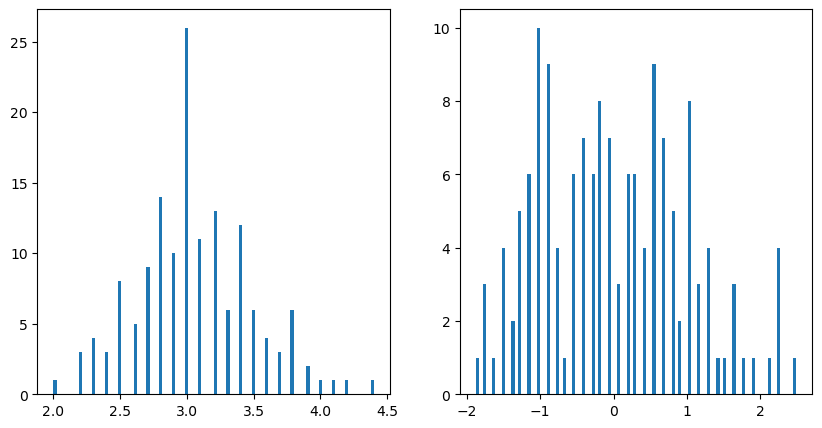

In [6]:
# visulize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(10,5))
plt.subplot(121)
x1 = x.loc[:,'Sepal.Width']
plt.hist(x1, bins = 100)
plt.subplot(122)
plt.hist(x_norm[:,1],bins = 100)
plt.show()

In [7]:
# calculate mean and sigma
x1_mean = x1.mean()
x1_sigma = x1.std()
x1_norm_mean = x_norm[:,1].mean()
x1_norm_sigma = x_norm[:,1].std()
print(x1_mean,x1_norm_mean,x1_sigma,x1_norm_sigma)

3.0573333333333337 -4.736951571734001e-16 0.435866284936698 1.0


In [8]:
print(x.shape)

(150, 5)


In [9]:
# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_norm)
#calculate the variance ration of each principle components
var_ration = pca.explained_variance_ratio_
print(var_ration)

[0.74845859 0.18287672 0.04699932 0.0175233 ]


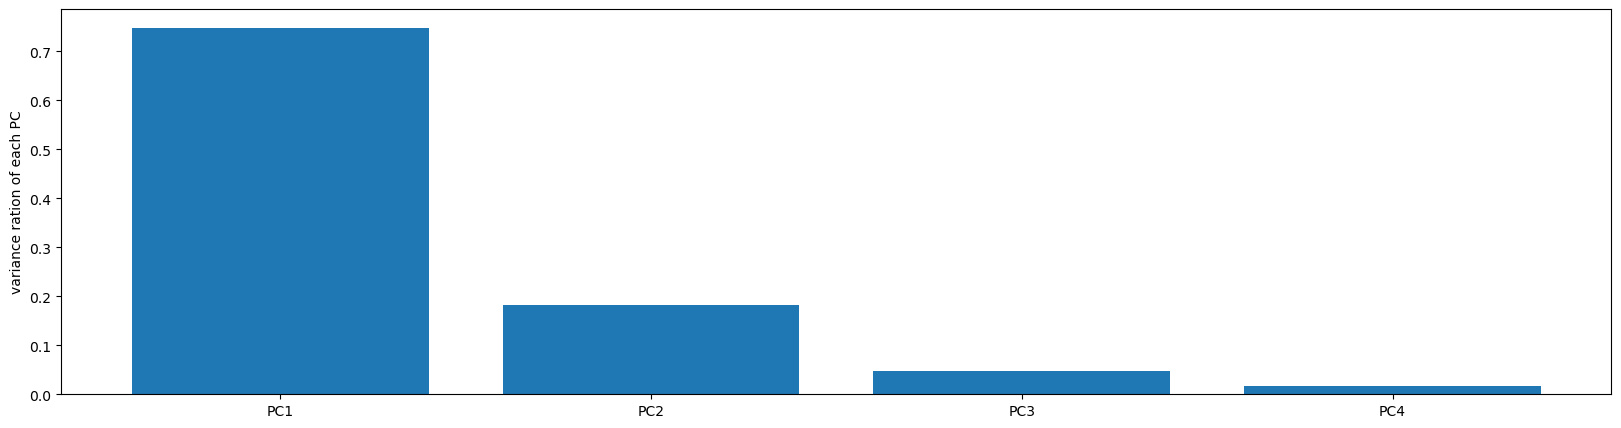

In [10]:
# visulize the 
fig2 = plt.figure(figsize=(20,5))
plt.bar([1,2,3,4],var_ration)
plt.xticks([1,2,3,4],['PC1','PC2','PC3','PC4'])
plt.ylabel('variance ration of each PC')
plt.show()

In [11]:
# PCA analysis with componnets =2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)
#calculate the variance ration of each principle components

In [12]:
pd.value_counts(y)

/var/folders/ds/j8tk9r0n0gl_921l_8sqysqr0000gp/T/ipykernel_3907/3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

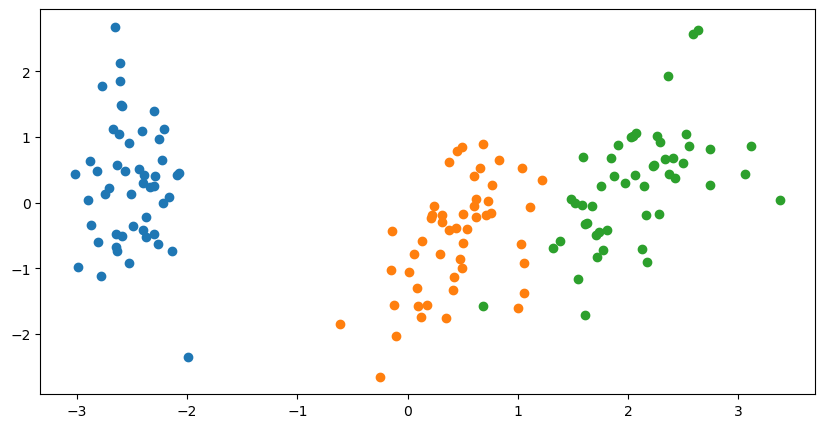

In [13]:
# visulize the 
fig3 = plt.figure(figsize=(10,5))
setosa = plt.scatter(x_pca[:,0][y=='setosa' ],x_pca[:,1][y=='setosa'])
versicolor = plt.scatter(x_pca[:,0][y=='versicolor'],x_pca[:,1][y=='versicolor'])
virginica = plt.scatter(x_pca[:,0][y=='virginica'],x_pca[:,1][y=='virginica'])
plt.show()

In [14]:
# reestablish the KNN model
KNN_new = KNeighborsClassifier(n_neighbors=3)
KNN_new.fit(x_pca,y)
y_predict_new = KNN_new.predict(x_pca)
print(y_predict_new)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [15]:
# accurancy
accurancy_new = accuracy_score(y,y_predict_new)
print(accurancy_new)

0.9933333333333333
